# Workshop 3: Train Maintenance Bayesian Network

## What you need to do before workshop 

Before you begin with the workshop exercises, it is important for you to complete all the activities of the first week of Module 2A. It will help you to understand and apply your learning. 

#### Optional

To refresh your Python skills, go to the 'course resources' section in the 'Welcome to the course' module.

## Guide to use Jupyter Notebook


### What is Jupyter Notebook?

The Jupyter Notebook is a powerful tool for interactively developing and presenting programming exercises and assignments. 

A Jupyter Notebook consists of the code and its output into a single document. In a single document, you can combine visualisations, narrative text, mathematical equations, and codes to explain the exercise. You'll be able to run the code, display the output, and also add explanations, formulas, charts in a notebook and make the exercise more transparent, and understandable.


### What is .ipynb file?

Each .ipynb file is one Jupyter notebook and gets this .ipynb extension. If you create or download a new notebook, a new  .ipynb file will be created or downloaded. 


### Jupyter Notebook Interface

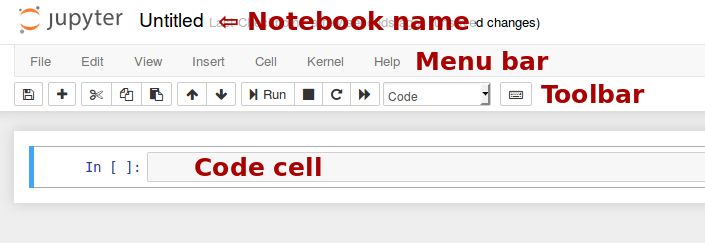



There are two fairly prominent terms that you should understand: cells and kernels. 

A kernel is a “computational engine” that executes the code contained in a notebook document.
A cell is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.


### Cells

Cells form the body of a notebook. The notebook consists of a sequence of cells. For example, this notebook consists of many  cells. 

There are two main cell types that we will use in this module:

#### Code Cell

A code cell contains code to be executed in the kernel. When the code is run, the notebook displays the output below the code cell that generated it.

#### Markdown Cell

A Markdown cell contains text formatted using Markdown and displays its output in-place when the Markdown cell is run.
Every cell starts off being a code cell, but its type can be changed by using a drop-down on the toolbar (which will be “Code”, initially).
The markdown cell will not give you any output if you run it as it is not a code cell.

#### Run a cell
To run a code cell, click on 'run' button on the toolbar or click cell on the menu bar and select run cells.


You can name a Jupyter Notebook by clicking on 'untitled' on the top of the notebook as shown in the screenshot above. Click on 'save' on the toolbar to save your work. You can download your notebook by clicking on 'file' in the menubar and download it as a notebook with .ipynb extension. 

## Let's get started

This week you are continuing to learn about the concept of classical AI. You covered uncertainty and probability. Now let's have a look at one approach to make decision within uncertainty. 

In this first exercise, you'll build and evaluate the Bayesian Network and the following are the steps:
1. Define a rain Node with a DiscreteDistribution with none (0.7), light (0.2) and heavy (0.1). 
2. Define a maintenance  Node with a ConditionalProbabolotyTable with the following table.

None/Light/Heavy |Accuracy
:----|:----
none|0.7
light|0.2
heavy|0.1

None/Light/Heavy |Yes/No |Accuracy
:----|:----|:---- 
none|yes|0.4
none|no|0.6
light|yes|0.2
light|no|0.8
heavy|yes|0.1
heavy|no|0.9

None/Light/Heavy | Yes/No | On Time/Delayed | Accuracy 
:----|:----|:----|:----
none | yes | on time | 0.8
none | yes | delayed | 0.2
none | no | on time | 0.9
none | no | delayed | 0.1
light | yes | on time | 0.6
light | yes | delayed | 0.4
light | no | on time | 0.7
light | no | delayed | 0.3
heavy | yes | on time | 0.4
heavy | yes | delayed | 0.6
heavy | no | on time | 0.5
heavy | no | delayed | 0.5

On Time/Delayed |Attend/Miss |Accuracy
:----|:----|:---- 
on time|attend|0.9
on time|miss|0.1
delayed|attend|0.6
delayed|miss|0.4

5. Create a Bayesian Network and add states.
6. Add edges connecting nodes (rain, maintenance), (rain, train), (maintenance, train) and (rain, appointment).
7. Bake the model.
8. Calculate probability for a given observation (none, no, on time, attend)
9. Calculate predictions based on the evidence that the train was delayed
10. Display the predictions.

Import the pomegranate library

In [1]:
from pomegranate import *

Define the probabilities for rain

In [5]:
rain = Node(DiscreteDistribution({
    "none": 0.7,
    "light": 0.2,
    "heavy": 0.1
}), name="rain")
rain

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "none" : 0.7,
                "light" : 0.2,
                "heavy" : 0.1
            }
        ],
        "frozen" : false
    },
    "name" : "rain",
    "weight" : 1.0
}

Define the probabilities for maintenance is conditional on rain

In [6]:
maintenance = Node(ConditionalProbabilityTable([
    ["none", "yes", 0.4],
    ["none", "no", 0.6],
    ["light", "yes", 0.2],
    ["light", "no", 0.8],
    ["heavy", "yes", 0.1],
    ["heavy", "no", 0.9]
], [rain.distribution]), name="maintenance")
maintenance

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "ConditionalProbabilityTable",
        "table" : [
            [
                "none",
                "yes",
                "0.4"
            ],
            [
                "none",
                "no",
                "0.6"
            ],
            [
                "light",
                "yes",
                "0.2"
            ],
            [
                "light",
                "no",
                "0.8"
            ],
            [
                "heavy",
                "yes",
                "0.10000000000000002"
            ],
            [
                "heavy",
                "no",
                "0.9"
            ]
        ],
        "dtypes" : [
            "str",
            "str",
            "float"
        ],
        "parents" : [
            {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "Discrete

Define the probabilities for train is conditional on rain and maintenance

In [7]:
train = Node(ConditionalProbabilityTable([
    ["none", "yes", "on time", 0.8],
    ["none", "yes", "delayed", 0.2],
    ["none", "no", "on time", 0.9],
    ["none", "no", "delayed", 0.1],
    ["light", "yes", "on time", 0.6],
    ["light", "yes", "delayed", 0.4],
    ["light", "no", "on time", 0.7],
    ["light", "no", "delayed", 0.3],
    ["heavy", "yes", "on time", 0.4],
    ["heavy", "yes", "delayed", 0.6],
    ["heavy", "no", "on time", 0.5],
    ["heavy", "no", "delayed", 0.5],
], [rain.distribution, maintenance.distribution]), name="train")
train

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "ConditionalProbabilityTable",
        "table" : [
            [
                "none",
                "yes",
                "on time",
                "0.8"
            ],
            [
                "none",
                "yes",
                "delayed",
                "0.2"
            ],
            [
                "none",
                "no",
                "on time",
                "0.9"
            ],
            [
                "none",
                "no",
                "delayed",
                "0.10000000000000002"
            ],
            [
                "light",
                "yes",
                "on time",
                "0.6"
            ],
            [
                "light",
                "yes",
                "delayed",
                "0.4"
            ],
            [
                "light",
                "no",
                "on tim

Define the probabilities for appointment is conditional on train

In [8]:
appointment = Node(ConditionalProbabilityTable([
    ["on time", "attend", 0.9],
    ["on time", "miss", 0.1],
    ["delayed", "attend", 0.6],
    ["delayed", "miss", 0.4]
], [train.distribution]), name="appointment")
appointment

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "ConditionalProbabilityTable",
        "table" : [
            [
                "on time",
                "attend",
                "0.9"
            ],
            [
                "on time",
                "miss",
                "0.10000000000000002"
            ],
            [
                "delayed",
                "attend",
                "0.6"
            ],
            [
                "delayed",
                "miss",
                "0.4"
            ]
        ],
        "dtypes" : [
            "str",
            "str",
            "float"
        ],
        "parents" : [
            {
                "class" : "Distribution",
                "name" : "ConditionalProbabilityTable",
                "table" : [
                    [
                        "none",
                        "yes",
                        "on time",
                        "0.8"
          

Create the Bayesian Network

In [9]:
model = BayesianNetwork()

Add the states to the network

In [10]:
model.add_state(rain)
model.add_state(maintenance)
model.add_state(train)
model.add_state(appointment)

Add the edges

In [11]:
model.add_edge(rain, maintenance)
model.add_edge(rain, train)
model.add_edge(maintenance, train)
model.add_edge(train, appointment)

Train the model

In [12]:
model.bake()

Calculate probability for a given observation

In [14]:
probability = model.probability([["none", "no", "on time", "attend"]])
probability

0.34019999999999995

Calculate predictions based on the evidence that their was light rain

In [15]:
predictions = model.predict_proba({
    "rain": "light"
})
probability

0.34019999999999995

Print predictions for each node

In [16]:
for node, prediction in zip(model.states, predictions):
    if isinstance(prediction, str):
        print(f"{node.name}: {prediction}")
    else:
        print(f"{node.name}")
        for value, probability in prediction.parameters[0].items():
            print(f"    {value}: {probability:.4f}")

rain: light
maintenance
    yes: 0.2000
    no: 0.8000
train
    on time: 0.6800
    delayed: 0.3200
appointment
    attend: 0.8040
    miss: 0.1960
